In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import openpyxl
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [2]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [5]:
# Importing models
from sklearn.linear_model import LinearRegression

In [6]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.079
OverallQual,0.214395
OverallCond,0.096479
YearBuilt,0.160799
YearRemodAdd,0.025352
BsmtFinSF1,0.091466
BsmtUnfSF,-0.03308
TotalBsmtSF,0.138199


###### Ridge Regression

In [8]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [9]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091361
0.11710797319753014
0.11723952924901133
0.11741457158889532
0.11762384068711469
0.11825709631198028
0.11900057469147939
0.12254649996292959
0.1307359968074713


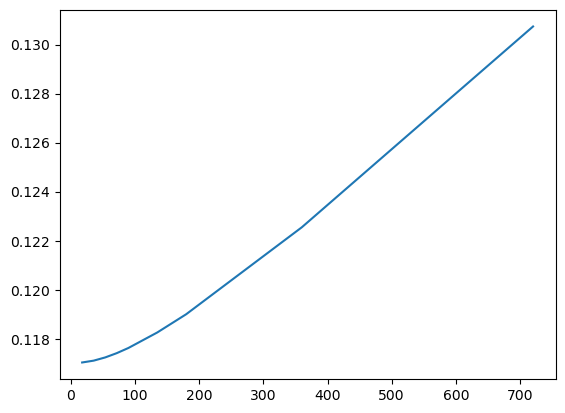

In [10]:
plt.plot(alphas, mses)

###### Lasso

In [11]:
# Import Lasso
from sklearn.linear_model import Lasso

In [12]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [13]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [14]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608793
0.11682687945311097
0.11803348353132033
0.12012836764958999
0.12301536903084047
0.13178576395045638
0.1401719458448378


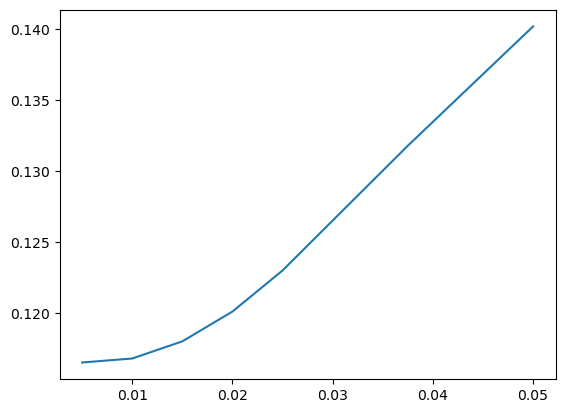

In [15]:
plt.plot(alphas, mses)

### Part A - Dealing with Missing Observations

#### **Mean** as a method of removing missing data

In [16]:
original_data = pd.read_excel('Original_Data.xlsx', engine='openpyxl', header=3) 
original_data = original_data.iloc[:,:-2]
print(original_data.head())

print(original_data['LotFrontage'].describe())
print(original_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [17]:
from sklearn.impute import SimpleImputer, KNNImputer

train_data = original_data.iloc[:1800].copy(deep=True)
validation_data = original_data.iloc[1800:2400].copy(deep=True)
test_data = original_data.iloc[2400:].copy(deep=True)

features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'LotArea']
target = 'SalePrice'

mean_imputer = SimpleImputer(strategy='mean')
train_data['LotFrontage'] = mean_imputer.fit_transform(train_data[['LotFrontage']])
validation_data['LotFrontage'] = mean_imputer.transform(validation_data[['LotFrontage']])
test_data['LotFrontage'] = mean_imputer.transform(test_data[['LotFrontage']])

In [18]:
lr = LinearRegression()
lr.fit(train_data[features], train_data[target])
lr.coef_

array([5.44186746e+02, 3.78464103e+04, 3.51888069e+02, 1.39595332e+00])

In [19]:
from sklearn.model_selection import GridSearchCV

def tune_alpha(train_data, features, target):
    # Define the parameter grid
    param_grid = {'alpha': [0.001, 0.015, 0.1, 1, 10, 100]}
    
    # Define the models
    lasso = Lasso()
    ridge = Ridge()

    # Setup grid searches
    grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search for Lasso
    grid_search_lasso.fit(train_data[features], train_data[target])
    lasso_best_alpha = grid_search_lasso.best_params_['alpha']

    # Perform grid search for Ridge
    grid_search_ridge.fit(train_data[features], train_data[target])
    ridge_best_alpha = grid_search_ridge.best_params_['alpha']

    return lasso_best_alpha, ridge_best_alpha

# Assuming 'train_data' is the training set after imputation
lasso_alpha, ridge_alpha = tune_alpha(train_data, features, target)
print(f"Optimal Lasso alpha: {lasso_alpha}")
print(f"Optimal Ridge alpha: {ridge_alpha}")

Optimal Lasso alpha: 0.001
Optimal Ridge alpha: 0.001


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_models(features, target, train_data, validation_data):
    results = {}
    strategies = ['mean', 'median', 'most_frequent']  # Imputation strategies
    models = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(alpha=0.001),  # Placeholder, should be tuned
        'Ridge': Ridge(alpha=0.001)   # Placeholder, should be tuned
    }

    # Apply each imputation strategy
    for strategy in strategies:
        imputer = SimpleImputer(strategy=strategy)
        train_data_imputed = train_data.copy()
        validation_data_imputed = validation_data.copy()
        train_data_imputed['LotFrontage'] = imputer.fit_transform(train_data[['LotFrontage']])
        validation_data_imputed['LotFrontage'] = imputer.transform(validation_data[['LotFrontage']])

        # Fitting each model 
        for model_name, model in models.items():
            model.fit(train_data_imputed[features], train_data_imputed[target])
            predictions = model.predict(validation_data_imputed[features])
            mse = mean_squared_error(validation_data_imputed[target], predictions)
            rmse = mse ** 0.5  # Corrected RMSE calculation
            mae = mean_absolute_error(validation_data_imputed[target], predictions)
            r2 = r2_score(validation_data_imputed[target], predictions)

            # Storing results
            results[f'{strategy}_{model_name}'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    return results

In [21]:
evaluation_results = evaluate_models(features, target, train_data, validation_data)

# Display the results
for key, value in evaluation_results.items():
    print(f"Imputation and Model: {key}")
    print(f"  MSE: {value['MSE']:.2f}")
    print(f"  RMSE: {value['RMSE']:.2f}")
    print(f"  MAE: {value['MAE']:.2f}")
    print(f"  R2: {value['R2']:.2f}")
    print('-----')

Imputation and Model: mean_Linear
  MSE: 1609724997.26
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: mean_Lasso
  MSE: 1609724999.36
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: mean_Ridge
  MSE: 1609725029.49
  RMSE: 40121.38
  MAE: 28862.63
  R2: 0.76
-----
Imputation and Model: median_Linear
  MSE: 1609724997.26
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: median_Lasso
  MSE: 1609724999.36
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: median_Ridge
  MSE: 1609725029.49
  RMSE: 40121.38
  MAE: 28862.63
  R2: 0.76
-----
Imputation and Model: most_frequent_Linear
  MSE: 1609724997.26
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: most_frequent_Lasso
  MSE: 1609724999.36
  RMSE: 40121.38
  MAE: 28862.64
  R2: 0.76
-----
Imputation and Model: most_frequent_Ridge
  MSE: 1609725029.49
  RMSE: 40121.38
  MAE: 28862.63
  R2: 0.76
-----


### Part B: Adding Lot Shape

In [22]:
## Part B (2pts): Add the categorical feature Lot Shape to the data set you used for Part A.
   ## - Fit all three regressions (Linear Regression, Lasso and Ridge).
##- Report on its performance, by how much do these two features (Lot Shape and Lot
##Frontage) improve prediction. Provide supporting explanation for your results.

# data_b = pd.concat([data_a,], axis=1)

"""
for house in original_data['HouseStyle']: # goes through each row in the house style column in the csv file
    if i not in HouseStyle_types: 
        HouseStyle_types.append(i)
        HouseStyle[i] = []
    # it creates a key in the dictionary for each house style, and it adds each key to a list
    # HouseStyle_types is a list of all house styles

for house in original_data['HouseStyle']: 
    for j in range(len(HouseStyle_types)):
        if i == HouseStyle_types[j]:
            HouseStyle[HouseStyle_types[j]].append(1)
        else:
            HouseStyle[HouseStyle_types[j]].append(0)

HouseStyle = pd.DataFrame.from_dict(HouseStyle)
"""

Lot Shape has 4 Categories. 
- let 0 = regular lot shape
- let 1 = slightly irregular
- let 2 = moderately irregular
- let 3 = irregular

### Create Categorical Variable

In [ ]:
lot_shapes = []
for row in original_data['HouseStyle']:
    if row == 'Reg':
        lot_shapes.append(0)
    elif row == 'IR1':
        lot_shapes.append(1)
    elif row == 'IR2':
        lot_shapes.append(2)
    else:
        lot_shapes.append(3)

Lot_Shape = pd.DataFrame(lot_shapes, columns=['HouseStyle'])

print(Lot_Shape)

### Standardizing Dummies

In [ ]:
LotShape_standardized = Lot_Shape
LotShape_standardized = (LotShape_standardized - LotShape_standardized.mean()) 
LotShape_standardized.head(5)


### Adding LotShape to DataFrame

In [ ]:
data_b = pd.concat([data_a, LotShape_standardized], axis=1)
data_b.head()

### Linear Regression

In [ ]:
train = data_b.iloc[:1800]
validation = data_b.iloc[1800:2400]
test = data_b.iloc[2400:2908]

X_train = train.drop('Sale Price', axis=1)
X_val = validation.drop('Sale Price', axis=1)
Y_train, Y_val = train[['Sale Price']], validation[['Sale Price']]

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
prediction = linear_reg.predict(X_train)
mse = mse(Y_train, prediction)
print("MSE: "+ str(mse))
print("RMSE: " + str(np.sqrt(mse)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))
prediction1 = linear_reg.predict(X_val)
mse1 = mse(Y_train, prediction)
print(mse1)
print("RMSE: " + str(np.sqrt(mse1)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))

In [ ]:
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(linear_reg.intercept_) + list(linear_reg.coef_[0])
    ]
).transpose().set_index(0)
coeffs

### Lasso Regression, alpha = 0.01

In [ ]:
%%sql
lasso_reg = Lasso(alpha(0.01))
lasso_reg.fit(X_train, Y_train)

          coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso_reg.intercept_) + list(lasso_reg.coef_[0])
    ]
).transpose().set_index(0)
coeffs

In [ ]:
prediction = lasso_reg.predict(X_train)
mse = mse(Y_train, prediction)
print("MSE: "+ str(mse))
print("RMSE: " + str(np.sqrt(mse)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))
prediction1 = lasso_reg.predict(X_val)
mse1 = mse(Y_train, prediction)
print(mse1)
print("RMSE: " + str(np.sqrt(mse1)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))

### Ridge Regression

In [ ]:
alpha = 1800*0.01
ride_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train, Y_train)
prediction = ridge_reg.predict(X_train)
mse = mse(Y_train, prediction)
print("MSE: "+ str(mse))
print("RMSE: " + str(np.sqrt(mse)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))
prediction1 = ridge_reg.predict(X_val)
mse1 = mse(Y_train, prediction)
print(mse1)
print("RMSE: " + str(np.sqrt(mse1)))
print("MAE: " + str(mean_absolute_error(Y_train, prediction)))